# Architecture

<img src='diags/nn_1.dio.drawio.svg'/>

# Symbols & Naming Conventions


\begin{align}
    n &= \text{number of nodes}\\
    l &= \text{layer number}\\
    w,W &= \text{weights matrix}\\
    b &= \text{bias matrix}\\
    z,Z &= \text{hypthesis result (result before applying activation function)}\\
    g(z) &= \text{activation function}\\
    a,A &= \text{activation matrix (result after applying activation function)}\\
    x,X &= \text{input to network}\\
    \hat{y} &= \text{output of network}\\
\end{align}

values for forward propogation
\begin{align}
    \huge{n^{[l]}} &= \text{number of nodes in the layer}\\
    \huge{z^{[l]}} &= \text{hypothesis result of the layer}\\
    \huge{w^{[l]}} &= \text{weights results of the layer}\\
    \huge{b^{[l]}} &= \text{bias results of the layer}\\
    \huge{a^{[l]}} &= \text{activation results of the layer}\\
\end{align}

derivatives for backward propogation
\begin{align}
    \huge{dw^{[l]}} &= \frac{\partial L}{\partial w} \rightarrow \text{loss derivative based on weights}\\
    \huge{db^{[l]}} &= \frac{\partial L}{\partial b} \rightarrow \text{ loss derivative based on biases}\\
    \huge{dz^{[l]}} &= \frac{\partial L}{\partial z} \rightarrow \text{ loss derivative based on hypothesis result}\\
    \huge{da^{[l]}} &= \frac{\partial L}{\partial a} \rightarrow \text{ loss derivative based on activation result}\\
\end{align}

# Flow

<img src='diags/nn_flow.drawio.svg'/>

# Shapes 


\begin{array}{ | c | c | c | }
    \hline
    W^{[l]} & ( n^{[l]} , n^{[l-1]} ) & dW^{[l]} \\
    \hline
    b^{[l]} & ( 1 , n^{[l]}  ) & db^{[l]} \\
    \hline
    Z^{[l]} & ( n^{[l]} , n^{[l-1]} ) & dZ^{[l]} \\
    \hline
    A^{[l]} & ( n^{[l]} , n^{[l-1]} ) & dA^{[l]} \\
    \hline
\end{array} 
where\
l = layer number >= 1\
$A^{[0]}$ = X

# Dense Layer

How do we actually initialize a layer for a New Neural Network?

* initialization of weights with small random values

    * why? because according to Andrew Ng's explanation if all the weights/params are
    initialized by zero or same value then all the hidden units will be symmetric with identical nodes.
    
    * With identical nodes there will be no learning/ decision making. because all the decisions
    shares same value.
    
    * If all the nodes will have zero values(weights are zero , multiplication with weights will also be zero) and propogation result wont be a conclusive one(dead network).

* initialization of bias can be zero. 

    * as randomness is already introduced by weights.
    But for smaller Neural Network it is advised to not to initialize with zero.

\begin{align}
X &= \begin{bmatrix}
    x_1^{(1)} && x_1^{(2)} && \dots && x_1^{(m)}\\
    x_2^{(1)} && x_2^{(2)} && \dots && x_2^{(m)}\\
    && && \vdots \\
    x_n^{(1)} && x_n^{(2)} && \dots && x_n^{(m)}\\
\end{bmatrix}_{n \times m}\\
W &= \begin{bmatrix}
    w_1^{(1)} && w_1^{(2)} && \dots && w_1^{(m)}\\
    w_2^{(1)} && w_2^{(2)} && \dots && w_2^{(m)}\\
    && && \vdots \\
    w_n^{(1)} && w_n^{(2)} && \dots && w_n^{(m)}\\
\end{bmatrix}_{n \times m}\\
b &= \begin{bmatrix}
    b_1 && b_2 && \dots & b_n
    \end{bmatrix}_{1 \times n}
\end{align}

\begin{align*}
Z &= X W^T + b\\
  \\
  &=\begin{bmatrix}
        x_1^{(1)} && x_1^{(2)} && \dots && x_1^{(m)}\\
        x_2^{(1)} && x_2^{(2)} && \dots && x_2^{(m)}\\
        && && \vdots \\
        x_n^{(1)} && x_n^{(2)} && \dots && x_n^{(m)}\\
    \end{bmatrix}_{n \times m}
    \begin{bmatrix}
        w_1^{(1)} && w_2^{(1)} && \dots && w_n^{(1)}\\
        w_1^{(2)} && w_2^{(2)} && \dots && w_n^{(2)}\\
        && && \vdots \\
        w_1^{(m)} && w_2^{(m)} && \dots && w_n^{(m)}\\
    \end{bmatrix}_{m \times n}+
    \begin{bmatrix}
        b_1 && b_2 && \dots & b_n
    \end{bmatrix}_{1 \times n}\\
  \\
  &= \begin{bmatrix}
        x_1^{(1)}w_1^{(1)}+ x_1^{(2)}w_1^{(2)} +\dots+x_1^{(m)}w_1^{(m)} && \dots && x_1^{(1)}w_n^{(1)}+ x_1^{(2)}w_n^{(2)} +\dots+x_1^{(m)}w_n^{(m)} \\
        x_2^{(1)}w_1^{(1)}+ x_2^{(2)}w_1^{(2)} +\dots+x_2^{(m)}w_1^{(m)} && \dots && x_2^{(1)}w_n^{(1)}+ x_2^{(2)}w_n^{(2)} +\dots+x_2^{(m)}w_n^{(m)} \\
       && \vdots \\
       x_n^{(1)}w_1^{(1)}+ x_n^{(2)}w_1^{(2)} +\dots+x_n^{(m)}w_1^{(m)} && \dots && x_n^{(1)}w_n^{(1)}+ x_n^{(2)}w_n^{(2)} +\dots+x_n^{(m)}w_n^{(m)}
     \end{bmatrix}_{n \times n}+
     \begin{bmatrix}
        b_1 && b_2 && \dots & b_n\\
        b_1 && b_2 && \dots & b_n\\
        && && \vdots\\
        b_1 && b_2 && \dots & b_n\\
     \end{bmatrix}_{n \times n \text{ broadcasting}}\\
  \\
  &= \begin{bmatrix}
        x_1^{(1)}w_1^{(1)}+ x_1^{(2)}w_1^{(2)} +\dots+x_1^{(m)}w_1^{(m)} + b_1 && \dots && x_1^{(1)}w_n^{(1)}+ x_1^{(2)}w_n^{(2)} +\dots+x_1^{(m)}w_n^{(m)}+ b_n \\
        x_2^{(1)}w_1^{(1)}+ x_2^{(2)}w_1^{(2)} +\dots+x_2^{(m)}w_1^{(m)} + b_1 && \dots && x_2^{(1)}w_n^{(1)}+ x_2^{(2)}w_n^{(2)} +\dots+x_2^{(m)}w_n^{(m)}+ b_n \\
       && \vdots \\
       x_n^{(1)}w_1^{(1)}+ x_n^{(2)}w_1^{(2)} +\dots+x_n^{(m)}w_1^{(m)} + b_1 && \dots && x_n^{(1)}w_n^{(1)}+ x_n^{(2)}w_n^{(2)} +\dots+x_n^{(m)}w_n^{(m)} + b_n
     \end{bmatrix}_{n \times n}
\end{align*}

## Forward

\begin{align*}
    Z^{[1]} &= A^{[0]} W^{[1]T} + b^{[1]}\\
    A^{[1]} &= g^{[1]}(Z^{[1]})\\
    \\
    Z^{[2]} &= A^{[1]} W^{[2]T} + b^{[2]}\\
    A^{[2]} &= g^{[2]}(Z^{[2]})\\
\end{align*}

`Generalized`
\begin{align*}
    Z^{[l]} &= A^{[l-1]} W^{[l]T} + b^{[l]}\\
    A^{[l]} &= g^{[l]}(Z^{[l]})
\end{align*}

In [24]:
from abc import ABC,abstractmethod
import numpy as np
import matplotlib.pyplot as plt

lets take two layers

* lets take layer 1 as input layer. This means input is x or $a^{[0]}$
    * lets take 3 columns = number of nodes = $n^{[0]} = 3$
    * and take 10 samples = m = 10
    * shape of $a^{[0]} = (n^{[0]},m)$ 
                        (3, 10)
    * shape of $w^{[1]} = (n^{[0]},m) = dw^{[1]}$ 
                    (3, 10)
    * shape of $b^{[1]} = (1, n^{[0]}) = db^{[1]}$ 
                    (1, 3)
    * shape of $z^{[1]} = (n^{[0]},m) (m, n^{[0]}) + (1, n^{[0]}) = (n^{[0]}, n^{[0]}) = dz^{[1]}$
                     (3, 10) (10, 3)+ (1, 3) = (3, 3)
    * shape of $z^{[1]}$ = shape of $a^{[1]} = (n^{[0]}, n^{[0]})$
                                    (3, 3)

* lets take layer 2 the next layer to that. The first one in hidden layer. Input to this layer is $a^{[1]}$
    * lets take number of nodes in the layer = 5 = $n^{[1]} = 5$
    * shape of $w^{[2]} = (n^{[1]},n^{[0]}) = dw^{[2]}$ 
                        (5 ,3)
    * shape of $b^{[2]} = (1, n^{[1]}) = db^{[2]}$ 
                    (1, 5)
    * shape of $z^{[2]} = (n^{[0]}, n^{[0]}) ( n^{[0]}, n^{[1]}) + (1, n^{[1]}) = (n^{[0]},n^{[1]}) = dz^{[2]}$
                    (3, 3) (3, 5) + (1, 5) = (3, 5)

In [2]:
n0 = 3 
n1 = 5
m = 10 

In [3]:
a0 = np.random.random((n0, m))
w1 = np.random.random((n0, m))
b1 = np.random.random((1, n0))
print(w1.shape, a0.shape,'+', b1.shape)

(3, 10) (3, 10) + (1, 3)


In [4]:
z1 = (a0 @ w1.T) + b1
z1.shape

(3, 3)

In [5]:
a1 = 1/(1 + np.exp(-z1))

a1.shape

(3, 3)

In [6]:
w2 = np.random.random((n1, n0))
b2 = np.random.random((1, n1))
print(w2.shape, a1.shape,'+', b2.shape)

(5, 3) (3, 3) + (1, 5)


In [7]:
z2 = (a1 @ w2.T) + b2
z2.shape

(3, 5)

In [8]:
a2 = 1/(1 + np.exp(-z2))
a2.shape

(3, 5)

## Backward

\begin{align*}
    & \text{param for this layer  (this function starts working from here)}\\
    dW &= dZ' .A^T\\
    dB &= \sum(dZ')\\
    \\
    & \text{input for next layer (in backward propogation)}\\
    dZ &= dZ' .W^T 
\end{align*}

In [9]:
dz2 = np.random.random((n0,n1))
dz2.shape

(3, 5)

In [10]:
dw2 = dz2 @ a2.T
dw2.shape

(3, 3)

In [11]:
db2 = dz2.sum(axis=0,keepdims=True)
db2.shape

(1, 5)

In [12]:
dz1 = dz2 @ w2
dz1.shape

(3, 3)

In [13]:
dw1 = dz1 @ a1.T
dw1.shape

(3, 3)

In [14]:
db1 = dz1.sum(axis=0,keepdims=True)
db1.shape

(1, 3)

In [15]:
dz1 @ w1

array([[1.79010256, 1.24363704, 1.14044947, 1.59485811, 2.5252642 ,
        2.75591499, 2.25962179, 1.60330399, 2.3738583 , 1.49153635],
       [2.34937498, 1.53907213, 1.42160994, 2.11720681, 3.18434689,
        3.50507928, 2.81904008, 2.00442235, 2.95554755, 1.80424898],
       [2.4838368 , 1.58558254, 1.50541413, 2.2915523 , 3.29941729,
        3.62176832, 2.93829308, 2.09030879, 3.06512188, 1.80576924]])

## Model

In [31]:
class LayerDense:
    """Layer Module
    
    It is recommended that input data X is scaled(data scaling operations)
    so that data is normalized but meaning of the data remains same.

    Args:
        n_inputs (int) : number of inputs 
        n_neurons (int) : number of neurons
    """
    def __init__(self,n_inputs,n_neurons):
        """
        """
        self.w = 0.10 * np.random.randn(n_inputs,n_neurons) # multiply by 0.1 to make it small
        self.b = np.zeros((1,n_neurons))

    def forward(self, a):
        """forward propogation calculation
        """
        self.a = a
        self.z = np.dot(self.a,self.w)+self.b 

    def backward(self, dz):
        """backward pass
        """
        # gradient on parameters 
        self.dw = dz @ self.a.T
        self.db = dz.sum(axis=0,keepdims=True)
        
        # gradient on values / input to next layer in backpropogation
        self.dz = dz @ self.w

# Activation Functions 

Notes:

1. Introducing non linearity to the network. Why?
2. According to me we need one parameter to compare all the nodes results after learning and passing the value to upcoming nodes.
3. To make sense of the data and a mapping for approximation.
4. Understand what is the impact of weights and biases changing value to the network/nodes.
    If there is only linear fx then it can only fit linear data but if we have not linear data like a sine wave then it will fail to do so. 
5. If there is no activate function then the whole network will be similar to a one linear node.

$w^T(w^T (w^T  x + b) + b) + b ... = output$ 



## Sigmoid

$f(x) = \frac{1}{(1 + e^{-x})}$

* granular
* between 0 and 1
* Comparatively complex calcultaion


In [30]:
class ActivationSigmoid:
    """Sigmoid Activation Fx
    """

    def __init__(self):
        self.output = None

    def forward(self, inputs):
        """Apply Sigmoid to input
        """
        self.output = 1 / (1 + np.exp(-inputs))

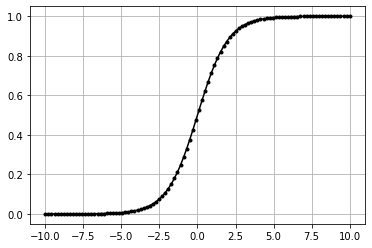

In [52]:
data = np.linspace(-10, 10, 100)
act = ActivationSigmoid()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Stepwise

$f(x) = 0$  | if $x \leq 0$

$f(x) = 1$  | if $x \gt 0$

* non granular 
* only 0 and 1

In [43]:
class ActivationStepwise:
    """Stepwise Activation Fx
    """

    def __init__(self):
        self.output = None

    def forward(self, inputs):
        """Apply Stepwise to inputs

        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.inputs = inputs # save inputs 
        self.output = (inputs > 0).astype('int') # calculate from inputs

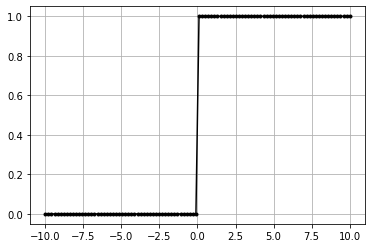

In [51]:
data = np.linspace(-10, 10, 100)
act = ActivationStepwise()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Relu


$f(x) = 0$  | if $x \leq 0$

$f(x) = x$  | if $x \gt 0$

* granular
* between 0 to x
* easy calculation 
* almost linear but rectified so less than zeros are not allowed.so introducing slight non linearity makes it eligible for an activation function but also inherently easy and fast calculation than sigmoid.

In [33]:
class ActivationReLU:
    """ReLU Activation Fx

    """

    def __init__(self):
        pass
    
    def forward(self, inputs):
        """Apply ReLU to input
        
        Args:
            inputs (numpy.ndarray) : input matrix
        """
        self.inputs = inputs # save inputs 
        self.output = np.maximum(0, inputs) # calculate from inputs

    def backward(self, dvalues):
        """Apply backward propogation

        Args:
            dvalues (numpy.ndarray) : inputs from previous later in backward prop
        """
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

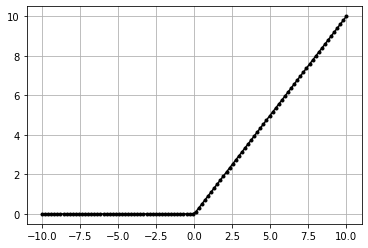

In [50]:
data = np.linspace(-10, 10, 100)
act = ActivationReLU()
act.forward(data)


plt.plot(data,act.output,'k.-')
plt.grid()

## Softmax

In [55]:
class ActivationSoftmax:

    def forward(self, inputs):
        """Forward propogation calculation

        Args:
            inputs (numpy.ndarray) : input matrix
        """
        exp_values = np.exp(inputs - np.max(inputs, axis=0, keepdims=True))
        probabilites = exp_values / np.sum(exp_values, axis=0, keepdims=True)
        self.output = probabilites

    def backward(self, dvalues):
        """backward pass

        Args:
            dvalues (numpy.ndarray) : gradient values
        """
        pass
        

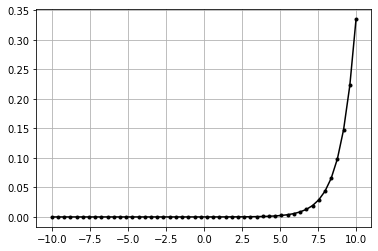

In [56]:
data = np.linspace(-10,10).reshape(-1,1)
act = ActivationSoftmax()
act.forward(np.linspace(-10,10))


plt.plot(data,act.output,'k.-')
plt.grid()

# Loss 

In [17]:
class Loss(ABC):
    """Loss Meta class 
    """
    @abstractmethod
    def __init__(self):
        pass

    @abstractmethod
    def forward(self):
        """mandatory method for child class
        """
        pass

    def calculate(self, output, y):
        """Calculate mean loss
        
        Args:
            output : output from the layer
            y : truth value/ target/ expected outcome
        """
        # it can be individual outcome of different kind of loss functions
        sample_losses = self.forward(output, y) 
        
        # calculating mean
        data_loss = np.mean(sample_losses)
        return data_loss

## Categorical Cross Entropy

\begin{align}
    L(a^{[l]},y) &= y log(a^{[l]}) + (1 - y) log(1 - a^{[l]})\\
    \\
    \text{derivative of loss over a --> da}\\
    \frac{\partial L}{\partial a} &= \big[ \frac{y}{a} + \frac{1 -y}{1 - a}(-1) \big]\\
    \frac{\partial L}{\partial a} &= \big[ \frac{y}{a} - \frac{1 -y}{1 - a} \big]\\
    \\
    \text{derivative of loss over z --> dz}\\
    \frac{\partial L}{\partial z} &= \frac{\partial L}{\partial a} \frac{\partial a}{\partial z}\\
    \\
    \text{derivative of loss over w --> dw}\\
    \frac{\partial L}{\partial w} &= \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial w}
    \\
    \text{derivative of loss over b --> db}\\
    \frac{\partial L}{\partial b} &= \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial b}
\end{align}


* y_pred_clipped
    * numpy.clip is used to clip the values from min and max values like bandpass filter
    * min = 1.0 * 10^-7 
    * max = 1 - 1.0 * 10^-7
    

* correct_confidences 
    * probabilities for target value that has been 
    * calculated earlier 
    * only for categorical variables

In [35]:
class LossCategoricalCrossEntropy(Loss):
    """Categorical Cross entropy loss 
    """
    
    def forward(self, y_pred, y_true):
        """forward propogation calculation 

        Args:
            y_pred (numpy.ndarray) : predictions generated
            y_true (numpy.ndarray) : actual values
        """

        # get total number of rows/samples
        samples = len(y_pred)

        
        y_pred_clipped = np.clip(y_pred,1e-7,1-1e-7)
        
        correct_confidences = None
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)
        
        else:
            pass
        
        # losses
        negative_log_Likelihoods = -np.log(correct_confidences)
        return negative_log_Likelihoods